# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

#work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

#os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.9.1+cu102


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

#work_dir = '/home/ubuntu/'

#os.chdir(work_dir)



import os

print(os.getcwd())



/home/ubuntu/sbi_for_eeg_data/notebooks


In [7]:
file = 'multi_round_10000_17params_threshold'


print(os.getcwd())

os.chdir('/home/ubuntu/results')


print(os.getcwd())
  

posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))



/home/ubuntu/sbi_for_eeg_data/notebooks
/home/ubuntu/results


In [8]:
obs_real_stat = posterior.default_x

In [10]:

samples = posterior.sample((1000,), not_within_prior=True)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

acceptance rate:  1.0


In [11]:
samples_t_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 100 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance

KeyboardInterrupt: 

In [12]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [13]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.3

print(diff)

list_min = list(torch.nn.functional.relu(list_min - diff))
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-4.9147e-01, -1.4512e-01, -2.0105e+00, -1.8176e-01, -6.9966e-02,
         2.1566e+01, -6.7395e-05, -9.1960e-02, -1.4144e-02, -8.3900e-02,
        -1.2302e-01,  5.7918e+01, -4.3625e+00, -4.7174e+00, -2.6692e-01,
        -2.8947e-02,  1.1101e+02])
tensor([1.4303e+00, 2.6380e-01, 3.7815e+00, 9.9305e-01, 2.0260e-02, 2.9942e+01,
        1.1529e-04, 9.3238e-02, 3.6122e-02, 7.2403e-02, 2.6926e-01, 7.2348e+01,
        1.3072e+01, 8.0764e+00, 1.4756e+00, 1.5416e+00, 1.4127e+02])
tensor([5.7653e-01, 1.2268e-01, 1.7376e+00, 3.5244e-01, 2.7068e-02, 2.5130e+00,
        5.4807e-05, 5.5559e-02, 1.5080e-02, 4.6891e-02, 1.1768e-01, 4.3287e+00,
        5.2304e+00, 3.8381e+00, 5.2276e-01, 4.7116e-01, 9.0761e+00])


In [14]:
limits

[[tensor(0.), tensor(2.0068)],
 [tensor(0.), tensor(0.3865)],
 [tensor(0.), tensor(5.5190)],
 [tensor(0.), tensor(1.3455)],
 [tensor(0.), tensor(0.0473)],
 [tensor(19.0527), tensor(32.4553)],
 [tensor(0.), tensor(0.0002)],
 [tensor(0.), tensor(0.1488)],
 [tensor(0.), tensor(0.0512)],
 [tensor(0.), tensor(0.1193)],
 [tensor(0.), tensor(0.3869)],
 [tensor(53.5897), tensor(76.6763)],
 [tensor(0.), tensor(18.3025)],
 [tensor(0.), tensor(11.9146)],
 [tensor(0.), tensor(1.9984)],
 [tensor(0.), tensor(2.0128)],
 [tensor(101.9354), tensor(150.3413)]]

In [15]:
#limits = [list(tup ) for tup in zip(prior_min, prior_max)]

parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

In [16]:
true_params_threshold = torch.tensor([0.08831, 0.01525, 0.19934, 0, 0, 26.61, 
                                     0.000007, 0.006562, 0.004317, 0.080074, 0.019482, 63.53,
                                     1.43884, 0.684013, 0, 0, 137.12])

<Figure size 432x288 with 0 Axes>

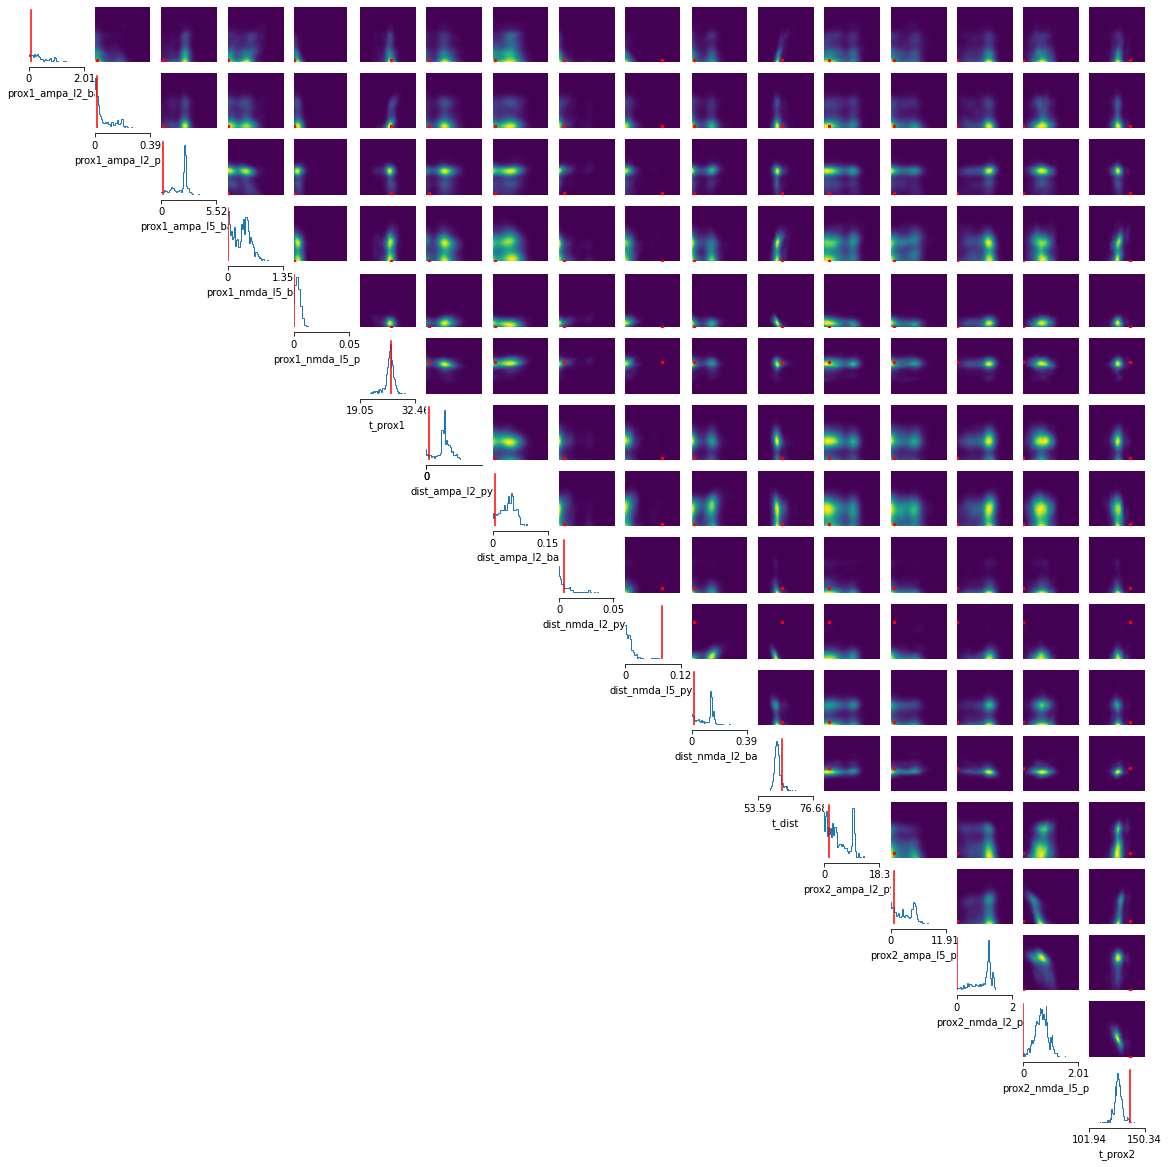

In [17]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params_threshold,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)



#for i in range(5):
#    axes[i][i].xaxis.label.set_color('magenta')
#for i in range(5, 12):
#    axes[i][i].xaxis.label.set_color('navy')
#for i in range(12, 17):
#    axes[i][i].xaxis.label.set_color('deeppink')

In [18]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

true_params_supra = torch.tensor([0.08831, 0.01525,  0.19934, 0, 0, 26.61, 0, 0, 0, 0, 0, 63.53,
                                 1.43884, 0.684013, 0, 0, 137.12])

In [19]:
file = 'multi_round_10000_17params_supra'




thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))


obs_real2 = torch.load('{}/obs_real.pt'.format(file))

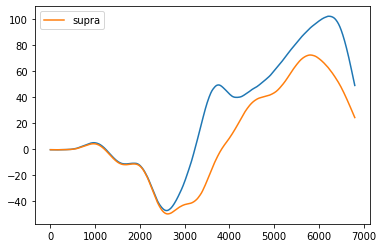

In [20]:
plt.plot(obs_real)
plt.plot(obs_real2, label = 'supra')
plt.legend()

In [21]:
samples_supra = posterior.sample((1000,), not_within_prior=True)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

acceptance rate:  1.0


In [22]:
samples_supra_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 100 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0


KeyboardInterrupt: 

In [23]:
torch.cat((samples_supra, samples), dim=0).shape

torch.Size([2000, 17])

In [24]:
##better limits:

list_min = torch.min(torch.cat((samples_supra, samples), dim=0), 0)[0]
list_max = torch.max(torch.cat((samples_supra, samples), dim=0), 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.4

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-4.9147e-01, -1.5235e-01, -2.1201e+00, -1.8176e-01, -6.9966e-02,
         1.8384e+01, -7.7710e-05, -1.0693e-01, -1.4144e-02, -8.3900e-02,
        -1.2302e-01,  5.7918e+01, -4.3625e+00, -4.7174e+00, -4.7118e-01,
        -2.3473e-01,  1.1101e+02])
tensor([1.4303e+00, 2.6924e-01, 4.2957e+00, 1.3446e+00, 2.0260e-02, 3.0405e+01,
        1.2801e-04, 1.2126e-01, 3.6122e-02, 3.1835e-01, 2.6926e-01, 7.4552e+01,
        1.4680e+01, 8.0764e+00, 1.6627e+00, 1.5416e+00, 1.5447e+02])
tensor([7.6871e-01, 1.6864e-01, 2.5663e+00, 6.1053e-01, 3.6090e-02, 4.8085e+00,
        8.2289e-05, 9.1278e-02, 2.0107e-02, 1.6090e-01, 1.5691e-01, 6.6536e+00,
        7.6170e+00, 5.1175e+00, 8.5355e-01, 7.1053e-01, 1.7382e+01])


In [25]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]

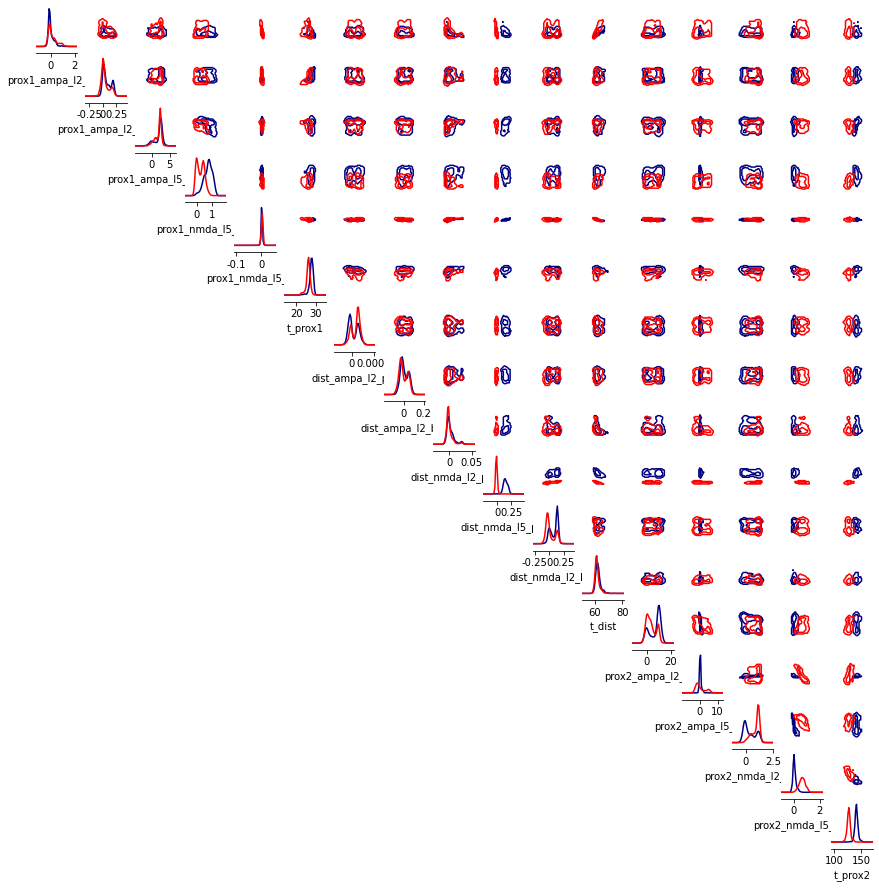

In [26]:
_ = analysis.pairplot(
    samples = [samples_supra, samples],
    #points = [true_params_supra, true_params_threshold],
    limits = limits,
    #subset: List[int] = None,
    upper = "contour",
    diag = "kde",
    figsize = (15, 15),
    labels= parameter_names,

    #ticks: Union[List, torch.Tensor] = [],
    #points_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    kde_offdiag = {
            "alpha": [0.8, 0.2],
            #"edgecolor": "none",
            #"rasterized": False,
            #'s': mpl.rcParams['lines.markersize'] ** 0.5,
            "bw_method": "scott",
            "bins": 50,
            #'cmap': 'viridis'
        },
    hist_offdiag_alpha = 0.02,
    points_offdiag={"markersize": 6},
    #samples_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    #fig=None,
    #axes=None,
    #**kwargs,
    scatter_offdiag = {
            "alpha": 0.2,
            "edgecolor": "none",
            "rasterized": True,
            's': mpl.rcParams['lines.markersize'] ** 0.5
        },
    contour_offdiag={"levels":  [0.68, 0.95]},
    samples_colors =  ['#000080', '#FF0000'],
)

In [ ]:
s_x_t = inference.run_only_sim(samples_t_100, simulation_wrapper=sim_wrapper, num_workers=8)
s_x_s = inference.run_only_sim(samples_supra_100, simulation_wrapper=sim_wrapper, num_workers=8)

param size param sizeparam size17param sizeparam size
 param size 17early stop  
param size  1717param size early stop

200.0 
171717early stop200.0 
param size 
 early stop
early stop early stop 200.0
 
param size 200.0param size 
early stop 17 param size 200.0  17
 17
200.01717200.0

param size 
param size 

  17
early stop
 param size 17200.0 

param size 17
 17
num_paramsnum_params 17
 17joblib will run over 1 jobs

num_paramsnum_params num_params 17
 joblib will run over 1 jobs17num_params
17 
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
joblib will run over 1 jobsnum_params17
 


joblib will run over 1 jobs17
joblib will run over 1 jobsjoblib will run over 1 jobsnum_params 
17

joblib will run over 1 jobs
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON modelLoading custom mechanism files from /home/ub

Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Si

Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation tim

early stop 200.0
param size  17
Simulation time: 180.0 ms...
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  51 tasks      | elapsed: 12.2min
Building the NEURON model
Simulation time: 10.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 29.25397165 29.1615805
 29.06922478]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 12.3min
obs [-0.59760178 -0.59840714 -0.59920666 ... 39.84467552 39.71379731
 39.58294626]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 12.3min
Simulation time: 190.0 ms...
Simulation time: 40.0 ms...
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 27.02881336 26.93454632
 26.84042215]
param size 17
early stop 200.0
param size  17
Building the NEURON model
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  54 tasks   

Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time:

Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 

Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.

Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...Simulation time: 140.0 ms...

Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...Simulation time: 150.0 ms...

Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation tim

In [ ]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [ ]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

In [ ]:
s_x_torch_t = torch.stack(([s_x_t[i] for i in range(100)]))
s_x_torch_s = torch.stack(([s_x_s[i] for i in range(100)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(100)]))


mean_s = torch.mean(s_x_torch_s, 0)
std_s = torch.std(s_x_torch_s, 0)

mean_t = torch.mean(s_x_torch_t, 0)
std_t = torch.std(s_x_torch_t, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower_s = mean_s - 1.96 * std_s

upper_s = mean_s + 1.96 * std_s


lower_t = mean_t - 1.96 * std_t

upper_t = mean_t + 1.96 * std_t


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



In [ ]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1, figsize=(15,15))
#ax.set_title("Comparing signal")

    
plt.plot(mean_t, color ='blue', label='mean of threshold posterior')
plt.plot(mean_s, color ='green', label='mean of suprathreshold posterior')

for s in s_x_t:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)
    
for s in s_x_s:
    plt.plot(s, alpha=0.05, color='green')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)

plt.plot(lower_t, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper_t, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_t, y2=upper_t, color='blue', alpha=0.1)

plt.plot(lower_s, color='green', linestyle='dashed', label='95% confidence')
plt.plot(upper_s, color='green', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_s, y2=upper_s, color='green', alpha=0.1)

#plt.xlim(0, 5100)
plt.ylim(-100, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
#plt.xlim(0, 6300)



plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real, color='blue', linewidth=5, linestyle='--', label='Ground truth')
plt.plot(obs_real2, linestyle = '--', label='Ground truth', color='green', linewidth=5)


plt.xticks([1000, 2000, 3000, 4000, 5000, 6000],[33, 66, 100, 133, 166, 200])

plt.xlim(0, 6000)
plt.legend()

In [ ]:
plt.savefig('threshold_stochastic.png')

## Correlation matrices

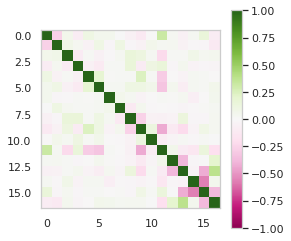

In [244]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


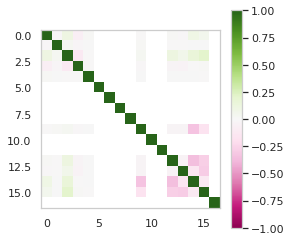

In [245]:
condition = posterior.sample((1,))

cond_coeff_mat = conditional_corrcoeff(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2., 2.]]*17),
)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

## Looking at correlations of parameters

In [ ]:
## parameter 3 and 4 should be highly correlated:

## Evaluation of features

In [8]:
import matplotlib.cm as cm
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable
from torch import Tensor
from typing import Tuple, List, Optional, Dict
from matplotlib.pyplot import Axes
from matplotlib.figure import Figure
from matplotlib.colors import LogNorm


In [83]:
t = obs_real_stat

t

tensor([[ 6.9800e+02,  2.6790e+03,  5.5510e+03,  5.0662e+00, -9.2767e+01,
          1.1571e+02,  3.0405e+00,  2.9002e+01,  1.1269e+02,  3.5632e+00,
          4.9754e+03,  6.3653e+00,  1.9096e+00, -1.1660e+01, -1.0371e+01,
         -1.5394e+01, -3.4815e+01, -6.5808e+01,  3.7142e+01]],
       dtype=torch.float64)

In [84]:
# t.shape

t1 = torch.cat((t[:,:1], t[:,1+1:]), axis = 1)
print(t1)
t1.shape

tensor([[ 6.9800e+02,  5.5510e+03,  5.0662e+00, -9.2767e+01,  1.1571e+02,
          3.0405e+00,  2.9002e+01,  1.1269e+02,  3.5632e+00,  4.9754e+03,
          6.3653e+00,  1.9096e+00, -1.1660e+01, -1.0371e+01, -1.5394e+01,
         -3.4815e+01, -6.5808e+01,  3.7142e+01]], dtype=torch.float64)


torch.Size([1, 18])

In [85]:
posterior.set_default_x(obs_real_stat)

In [86]:
thetas = posterior.sample((10000,))
thetas.shape

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

torch.Size([10000, 17])

In [89]:

for i in range(19):
    x = calculate_summary_stats_temporal(x_without)
    #leaving one summary statistic out
    x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
    print(x_c.shape)
    print('t shape', t.shape)
    print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
    inf = SNPE(prior=prior, density_estimator = 'nsf')
    inf = inf.append_simulations(thetas, x_c)
    density_estimator = inf.train()
    posterior1 = inf.build_posterior(density_estimator)
    globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))


batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
torch.Size([19000, 18])
t shape torch.Size([1, 19])
torch.Size([0, 19])


AssertionError: Number of parameter sets (=10000 must match the number of simulation outputs (=19000)

In [13]:
sum_stats_names =                                [
                    'arg_p50',
                    'arg_N100',
                    'arg_P200',
                    'p50',
                    'N100',
                    'P200',
                    'p50_moment1',
                    'N100_moment1',
                    'P200_moment1',
                    'p50_moment2',
                    'N100_moment2',
                    'P200_moment2',
                    'mean1000',
                    'mean1500',
                    'mean1700',
                    'mean1900',
                    'mean2100',
                    'mean2300',
                    'mean4000',
                ]

sample_list = []
for i in range(len(sum_stats_names)):
    sample_list.append(globals()['samples_%s' % i] )

    
plt.figure(figsize = (25,20))
im = plot_varchanges(sample_list, samples, xticklabels=sum_stats_names, yticklabels= parameter_names, plot_label='', batchsize=0)
plt.show(im)

KeyError: 'samples_0'

In [90]:
sample_batch = []
batch_size = 5

for i in range(batch_size):

    sample_list = []
    
    for i in range(19):
        

        x = calculate_summary_stats_temporal(x_without)
        #leaving one summary statistic out
        x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
        print(x_c.shape)
        print('t shape', t.shape)
        print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
        inf = SNPE(prior=prior, density_estimator = 'nsf')
        inf = inf.append_simulations(thetas, x_c)
        density_estimator = inf.train()
        posterior1 = inf.build_posterior(density_estimator)
        globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))
        
        sample_list.append(globals()['samples_%s' % i] )
        
    sample_batch.append(sample_list)

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

torch.Size([19000, 18])
t shape torch.Size([1, 19])
torch.Size([0, 19])


AssertionError: Number of parameter sets (=10000 must match the number of simulation outputs (=19000)

In [119]:
sample_batch

[]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'voltage ($\\mu V$)')

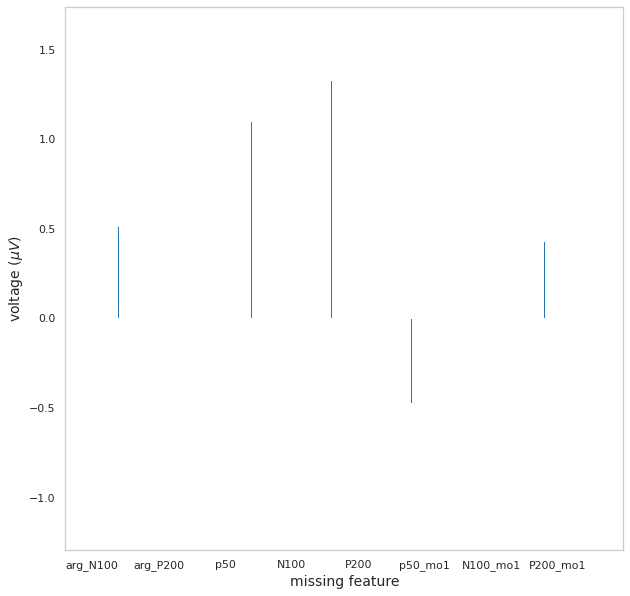

In [117]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)


plot_KLs(sample_list,
        samples,
        idx=0,
        batchsize=0,
         kind='bar',
        agg_with='mean'
    )


axes.set_xlabel("missing feature", size=14)
axes.set_xticklabels(sum_stats_names)
ax.tick_params(axis="both", which="major", labelsize=12)
ylabel = ax.get_ylabel()
axes.set_ylabel(ylabel, size=14)


## Histograms

In [65]:
s_x_prior_stat = calculate_summary_stats_temporal(s_x_prior_torch)

s_x_stat = calculate_summary_stats_temporal(s_x_torch)

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

In [52]:
s_x_prior_stat.shape

torch.Size([100, 19])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


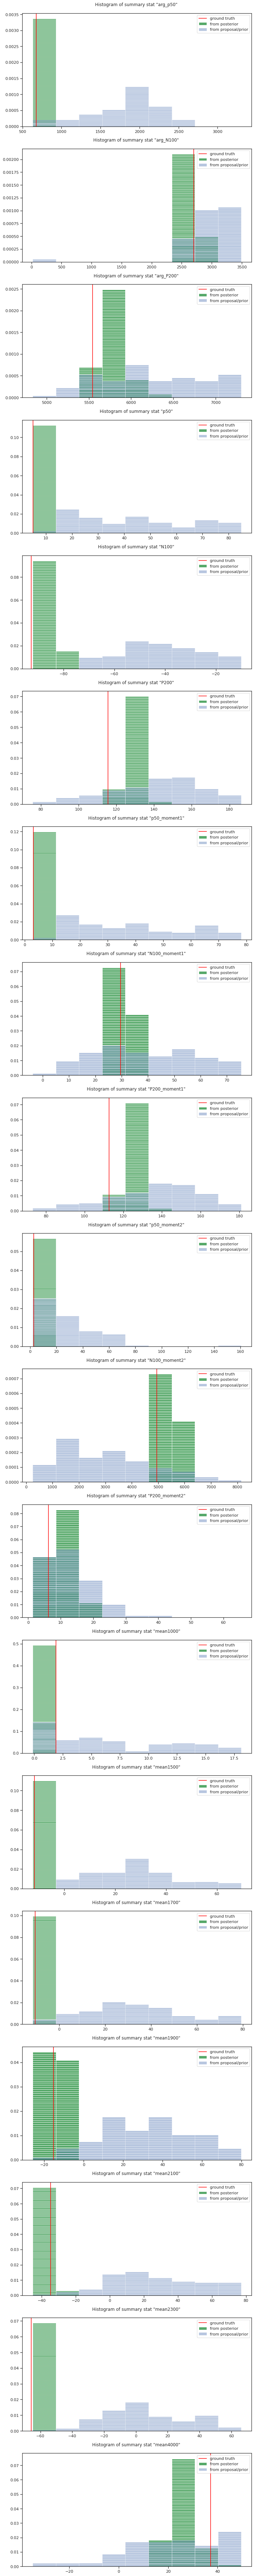

In [93]:
import matplotlib.gridspec as gridspec


import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("white")
sns.set_style("ticks")



fig = plt.figure(figsize=(10,100), tight_layout=True)

gs = gridspec.GridSpec(nrows=len(sum_stats_names), ncols=1)



#fig.suptitle('Summary stats histogram from posterior predictions.', y=0.2, fontsize=16)


for i in range(19):
    
    print(i)

    globals()['ax%s' % i] = fig.add_subplot(gs[i])

    globals()['sum_stats%s' % i] = []
    globals()['x%s' % i] = []

    for j in range(s_x_prior_stat.shape[0]):
        globals()['sum_stats%s' % i].append(s_x_stat[j][i])
        globals()['x%s' % i].append(s_x_prior_stat[j][i])

    sum_stat = globals()['sum_stats%s' % i]
    x_s = globals()['x%s' % i]

    ##define bins such that we get an equal number of bins at the end
    
    binsteps = np.abs(max([max(x_s), max(sum_stat)])-min([min(x_s), min(sum_stat)]))*0.1 
    
   
    binrange = np.arange(min([min(x_s), min(sum_stat)]), max([max(x_s), max(sum_stat)]), binsteps)
  

   
    
    globals()['ax%s' % i].hist(globals()['sum_stats%s' % i],  density=True, bins=binrange, facecolor='g', alpha=0.99, histtype='barstacked', label='from posterior')
    globals()['ax%s' % i].hist(globals()['x%s' % i],  density=True, bins=binrange, facecolor='b', alpha=0.4, histtype='barstacked', label='from proposal/prior')
    
  
    globals()['ax%s' % i].set_title('Histogram of summary stat "{}" '.format(sum_stats_names[i]), pad=20)
    #ax0.set(ylim=(-500, 7000))

    globals()['ax%s' % i].axvline(obs_real_stat[0][i].detach().numpy(), color='red', label='ground truth')
    globals()['ax%s' % i].legend(loc='upper right')

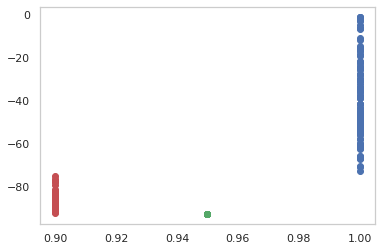

In [89]:
for i in range(100):

    plt.scatter(1,s_x_prior_stat[i][4], color='b')
    plt.scatter(0.9,s_x_stat[i][4], color='r')
    plt.scatter(0.95, obs_real_stat[0][4], color='g')

In [71]:
obs_real_stat[0][0]

tensor(677.)

In [8]:
from sbi.analysis.sbc import check_sbc, run_sbc, get_nltp
from sbi.analysis.plot import sbc_rank_plot
from sbi.inference import SNPE, SNPE_C, prepare_for_sbi, simulate_for_sbi
from sbi.simulators import linear_gaussian, diagonal_linear_gaussian

In [66]:
thetas = torch.stack(([samples_prior[i] for i in range(len(samples_prior))]))
xs = s_x_prior_stat

In [73]:
posterior.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[4.9720e-02, 1.9231e+01, 1.6711e-02, 6.1002e+01, 7.4212e-02, 1.1468e+02],
        [3.2012e-02, 1.9392e+01, 1.7936e-02, 6.2570e+01, 3.4590e-02, 1.1599e+02],
        [5.3737e-02, 1.9460e+01, 2.8572e-03, 6.1723e+01, 2.1022e-01, 1.1322e+02],
        ...,
        [6.5962e-02, 2.0285e+01, 7.5865e-03, 6.1476e+01, 5.8498e-02, 1.1233e+02],
        [5.3234e-02, 1.9263e+01, 8.2176e-03, 6.1631e+01, 2.7745e-02, 1.1345e+02],
        [6.3074e-02, 1.8466e+01, 1.3858e-02, 6.1144e+01, 6.8865e-02, 1.1506e+02]])

In [89]:
# run SBC: for each inference we draw 1000 posterior samples.
num_posterior_samples = 1000
ranks, dap_samples = run_sbc(thetas, xs, posterior, num_posterior_samples=num_posterior_samples)

check_stats = check_sbc(ranks, thetas, dap_samples, num_posterior_samples=num_posterior_samples)


print(f"kolmogorov-smirnov p-values \ncheck_stats['ks_pvals'] = {check_stats['ks_pvals'].numpy()}")


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/sbc.py:50: UserWarning: Number of SBC samples should be on the order of 100s to give realiable
            results. We recommend using 300.
  results. We recommend using 300."""


Running 100 sbc samples.:   0%|          | 0/100 [00:00<?, ?it/s]

assertion error


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn

kolmogorov-smirnov p-values 
check_stats['ks_pvals'] = [5.4196433e-26 6.1653069e-40 0.0000000e+00 1.2131434e-23 0.0000000e+00
 5.5036876e-17]


In [87]:
print(f"c2st accuracies \ncheck_stats['c2st_ranks'] = {check_stats['c2st_ranks'].numpy()}")
print(f"- c2st accuracies check_stats['c2st_dap'] = {check_stats['c2st_dap'].numpy()}")


c2st accuracies 
check_stats['c2st_ranks'] = [0.8   0.905 0.95  0.91  0.875 0.79 ]
- c2st accuracies check_stats['c2st_dap'] = [0.82  0.935 0.96  0.895 0.72  0.625]


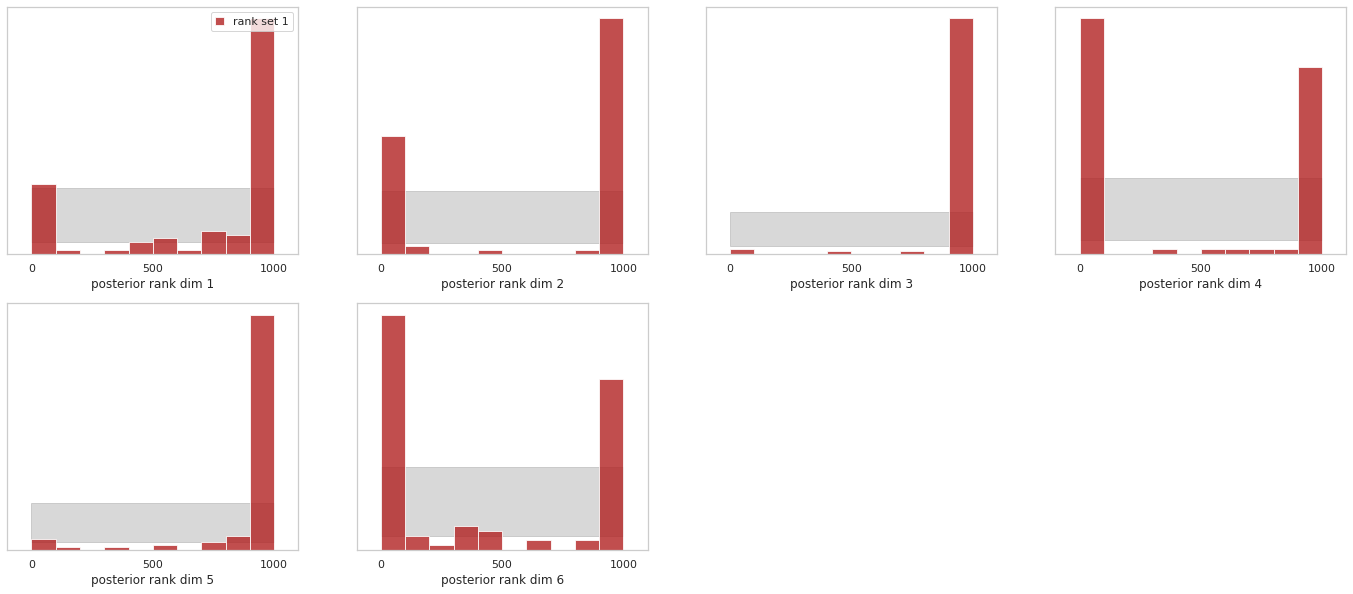

In [88]:
from sbi.analysis.plot import sbc_rank_plot

f, ax = sbc_rank_plot(ranks=ranks,
                      num_posterior_samples=num_posterior_samples,
                      plot_type="hist",
                      num_bins=10 # by passing None we use a heuristic for the number of bins.
                      )

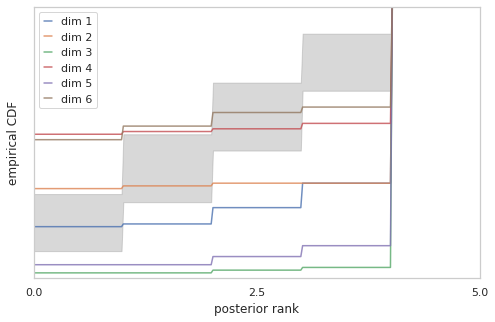

In [85]:
f, ax = sbc_rank_plot(ranks, 1_000, plot_type = "cdf")